In [1]:
import numpy as np
import pandas as pd
import torch
from torch import nn
from PIL import Image, UnidentifiedImageError
import os
from torch.utils.data import Dataset, DataLoader
import requests
import albumentations as A
from albumentations.pytorch import ToTensorV2
from torchvision import transforms
from tqdm.notebook import tqdm_notebook as tqdm
from io import BytesIO

/opt/conda/lib/python3.10/site-packages/albumentations/__init__.py:13: UserWarning: A new version of Albumentations is available: 1.4.18 (you have 1.4.17). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()


In [2]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cuda'

In [5]:
from transformers import BlipProcessor, BlipForConditionalGeneration

model_name = "Salesforce/blip-image-captioning-base"
processor = BlipProcessor.from_pretrained(model_name)
model = BlipForConditionalGeneration.from_pretrained(model_name)

model.to(device)

def generate_prompt_from_image(image_path):
    if image_path.startswith("http"):
        image = Image.open(requests.get(image_path, stream=True).raw)
    else:
        image = Image.open(image_path)
    
    inputs = processor(images=image, return_tensors="pt")
    inputs.to(device)

    # Generate the prompt
    prompt_ids = model.generate(**inputs)
    
    # Decode the generated ids to text
    prompt = processor.decode(prompt_ids[0], skip_special_tokens=True)
    
    return prompt

# Example usage with a local image

/opt/conda/lib/python3.10/site-packages/transformers/tokenization_utils_base.py:1617: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be deprecated in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


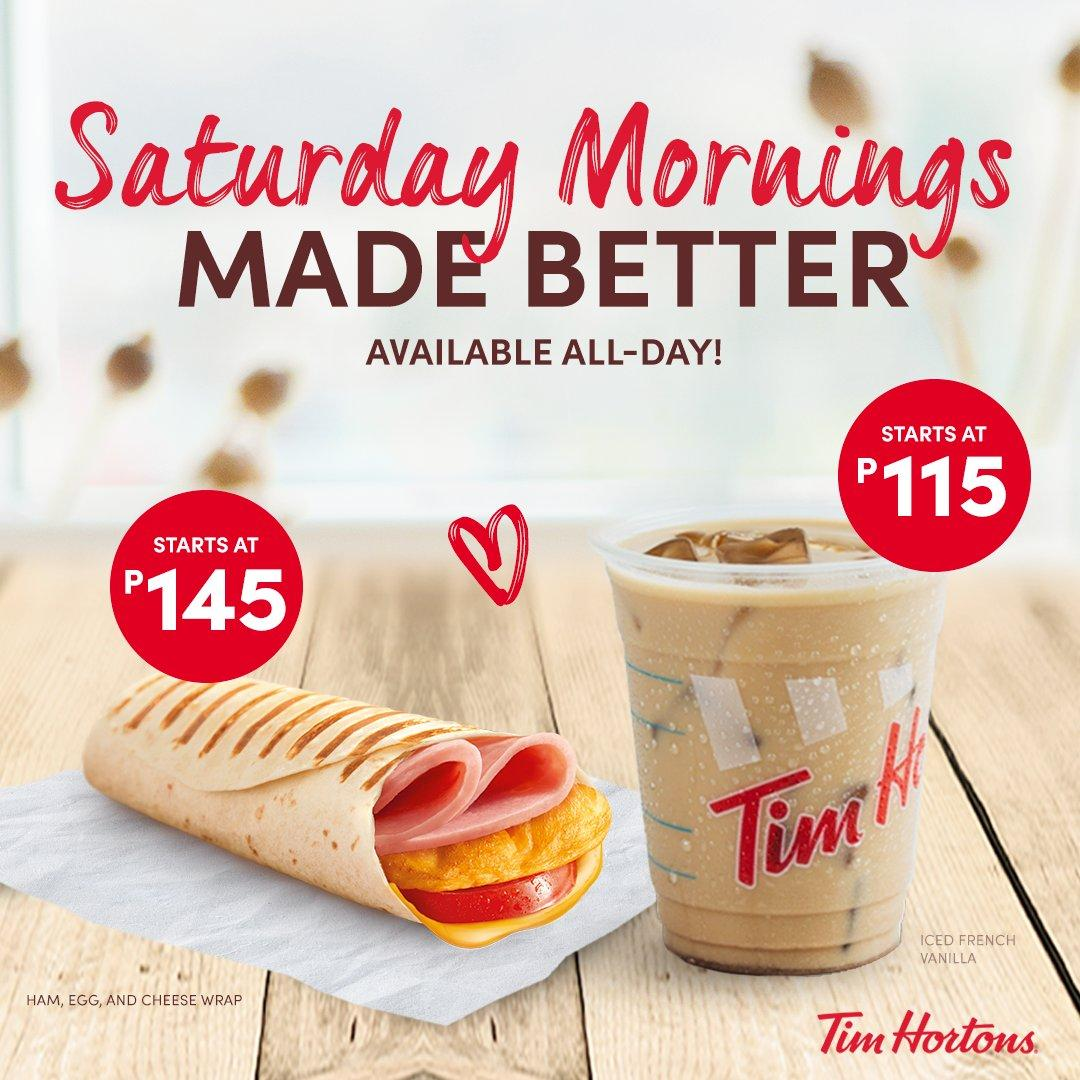

In [6]:
Image.open('/kaggle/input/adobe-photos-50k/data/image_1.jpeg')

In [10]:
import time
ti = time.time()
image_path = "/kaggle/input/adobe-photos-50k/data/image_1.jpeg"
prompt = generate_prompt_from_image(image_path)
tf = time.time()
print(f"Generated prompt: {prompt}")
print(f"Elapsed time: {(tf - ti)*1000} ms")

Generated prompt: a sandwich and a drink on a table
Elapsed time: 214.66326713562012 ms


In [12]:
print(f"Total time required for generating text prompt on 50k images for just 1 epoch = {50000*(tf - ti)/(3600)} hr")

Total time required for generating text prompt on 50k images for just 1 epoch = 2.9814342657725015 hr


In [13]:
"Almost 3 hours"

'Almost 3 hours'